In [0]:
!git clone https://github.com/maheshreddykukunooru/Face_recognition.git
!ls
!pwd
!cd Face_recognition/att_faces
!ls

# **Data Preparation**

In [0]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
import cv2
from sklearn.metrics import accuracy_score


X=[]
y=[]
for i in range(1,41):
	images = os.listdir('/content/Face_recognition/att_faces/s'+str(i))
	for image in images:
		img = cv2.imread('/content/Face_recognition/att_faces/s'+str(i)+"/"+image,0)
	  
		height1, width1 = img.shape[:2]
		#plt.imshow(img)
		#cv2.imshow('image',img)
		#cv2.waitKey(0)
		img_col = np.array(img, dtype='float64').flatten()
		subject = int(i)
		X.append(img_col)
		y.append(subject)

target_names = []
for i in range(1,41):
	name=''
	name+='s'+str(i)
	target_names.append(name)
X=np.array(X)
print(y)
print(X)
alldata=np.array(X)
alllabels=np.array(y)
X=[]
y=[]
for i in range(len(alldata)):
	if(i%2==0):
		X.append(alldata[i])
		y.append(alllabels[i])
train=[]
train_labels=[]		
i=0
for i in range(len(alldata)):
	if(i%2!=0):
		train.append(alldata[i])
		train_labels.append(alllabels[i])


train=np.array(train)
y=np.array(y)
X=np.array(X)
train_labels=np.array(train_labels)

print(len(alldata))
print(len(X)) 
print(len(train))
#print(y)
#print(X)

# **Principal Component Analysis**

In [0]:
mean=np.mean(np.array(X), axis=0)
mean=mean.reshape(1,len(X[0]))
print(mean)

In [0]:
z=np.array(X)-mean
print(z)

In [0]:
#cov= (1/(len(X)))*z.transpose().dot(z)
#print('covarience matrix')
#ov=np.cov(z)
cov=np.cov(z,rowvar = False)
print(cov)
print(len(cov))
print(len(cov[0]))

In [0]:
# TIME CONSUMING
iv, ivec = np.linalg.eigh(cov)

In [0]:
ids = np.argsort(iv)[::-1]
iv = iv[ids];
ivec = ivec[:, ids]

In [0]:
hashtable = {}
for i in range(len(iv)):
  hashtable[iv[i]] = i
np.sort(iv)
reverse_array = iv[::-1]
print(hashtable)

In [0]:
sumeighvals=np.sum(iv)

x_axis_95=[1,3,5,7]
y_axis_95=[]

x_axis=[.8,.85,.9,.95]
y_axis=[]

tolerence = 0.0
sumUeighvals = 0
alpha = 0.8
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat=np.array(X).dot(projectionmatrix)
pcatest=np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction))
print(len(pcamat[0]))

tolerence = 0.0
sumUeighvals = 0
alpha = 0.85
count = 0
for j in range (len(iv)):
  sumUeighvals =sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))


tolerence = 0.0
sumUeighvals = 0
alpha = 0.9
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))


tolerence = 0.0
sumUeighvals = 0
alpha = 0.95
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))
y_axis_95.append(accuracy_score(train_labels, prediction))

plt.plot(x_axis,y_axis)

In [0]:
sumeighvals=np.sum(iv)

x_axis=[.8,.85,.9,.95]
y_axis=[]

tolerence = 0.0
sumUeighvals = 0
alpha = 0.8
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat=np.array(X).dot(projectionmatrix)
pcatest=np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))


tolerence = 0.0
sumUeighvals = 0
alpha = 0.85
count = 0
for j in range (len(iv)):
  sumUeighvals =sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.9
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.95
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))
y_axis_95.append(accuracy_score(train_labels, prediction))

plt.plot(x_axis,y_axis)

In [0]:
sumeighvals=np.sum(iv)

x_axis=[.8,.85,.9,.95]
y_axis=[]

tolerence = 0.0
sumUeighvals = 0
alpha = 0.8
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat=np.array(X).dot(projectionmatrix)
pcatest=np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))


tolerence = 0.0
sumUeighvals = 0
alpha = 0.85
count = 0
for j in range (len(iv)):
  sumUeighvals =sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.9
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.95
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))
y_axis_95.append(accuracy_score(train_labels, prediction))

plt.plot(x_axis,y_axis)

In [0]:
sumeighvals=np.sum(iv)

x_axis=[.8,.85,.9,.95]
y_axis=[]

tolerence = 0.0
sumUeighvals = 0
alpha = 0.8
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat=np.array(X).dot(projectionmatrix)
pcatest=np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))


tolerence = 0.0
sumUeighvals = 0
alpha = 0.85
count = 0
for j in range (len(iv)):
  sumUeighvals =sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.9
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals+iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))



tolerence = 0.0
sumUeighvals = 0
alpha = 0.95
count = 0
for j in range (len(iv)):
  sumUeighvals = sumUeighvals + iv[j]
  tolerence = 1.0 * sumUeighvals/sumeighvals
  count = count + 1
  if(tolerence >= alpha):
    break;
j = 0  
eigenvectorsneeded = [] 

index = []
for i in range (count):
  index.append(i)
index = np.array(index)  
projectionmatrix = ivec[: , index]

pcamat = np.array(X).dot(projectionmatrix)
pcatest = np.array(train).dot(projectionmatrix)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(pcamat, y) 
prediction = neigh.predict(pcatest)

print('total accuracy', accuracy_score(train_labels, prediction), '\n\n')
print(len(pcamat[0]))
y_axis.append(accuracy_score(train_labels, prediction))
y_axis_95.append(accuracy_score(train_labels, prediction))

plt.plot(x_axis,y_axis)

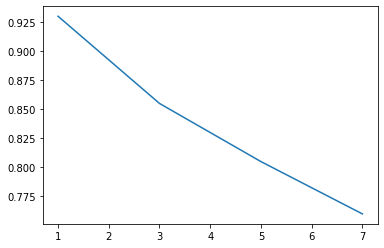

In [0]:
plt.plot(x_axis_95,y_axis_95)

# **Linear Discriminant Analysis**

In [0]:
seg_data = [[] for i in range(40)]
means = [[] for i in range(40)]
Zs = [[] for i in range(40)]

Sb = np.zeros([10304, 10304])
S = np.zeros([10304, 10304])
mean = np.mean(train, axis=0)
###################
mean=np.array(mean)
###################
for j in range(40):
    for i in range(5):
        seg_data[j].append(train[j*5+i])

for i in range(40):
    means[i] = np.mean(seg_data[i], axis=0) 
    mean_sub = means[i] - mean
    Sb += 5 * np.outer(mean_sub, mean_sub)

for j in range(40):
    for i in range(5):
        Zs[j].append(seg_data[j][i] - 1 * means[j])

for i in range(40):
    S += np.matmul(np.transpose(Zs[i]), Zs[i])

print('Between class scatter matrix:\n' + str(Sb))
print('\n\nWithin class scatter matrix:\n' + str(S))
print('\n\nSegmented data matrix:\n' + str(seg_data))
print('\n\nMean of each class:\n' + str(means))
print('\n\nCenterd data matrix:\n' + str(Zs))

In [0]:
# TIME CONSUMING (approx. 17 mins)
Sinv = np.linalg.pinv(S,  hermitian = True)
val, vec = np.linalg.eig((Sinv).dot(Sb))
print('Within class scatter matrix inverse:\n')
print(Sinv)

In [0]:
index = np.argsort(val)[::-1]
vec = vec[:, index]
print('Eigen-values:\n' + str(val))
print('\n\nEigen-vectors:\n' + str(vec))

In [0]:
W = vec[:, 0:39]
print(len(W))
print(len(W[0]))
print('\n\nBest discriminant line is:\n' + str(W.real))

In [0]:
projected_train = np.matmul(train, W)
projected_test = np.matmul(X, W)

#projected_train = []
#projected_test = []
#for item in train:
#    projected_train.append(np.dot(W, item))

#for item in X:
#    projected_test.append(np.dot(W, item))

projected_train = np.array(projected_train)
projected_test = np.array(projected_test)

projected_train = projected_train.real
projected_test = projected_test.real

In [0]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(projected_train.real, train_labels) 
prediction = neigh.predict(projected_test)

x_axis=[1,3,5,7]
y_axis=[]

print('1 neighbour total accuracy:', accuracy_score(train_labels, prediction), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(projected_train.real, train_labels) 
prediction = neigh.predict(projected_test)

print('3 neighbours total accuracy:', accuracy_score(train_labels, prediction), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction))

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(projected_train.real, train_labels) 
prediction = neigh.predict(projected_test)

print('5 neighbours total accuracy:', accuracy_score(train_labels, prediction), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction))

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(projected_train.real, train_labels) 
prediction = neigh.predict(projected_test)

print('7 neighbours total accuracy:', accuracy_score(train_labels, prediction), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction))

plt.plot(x_axis,y_axis)



Another LDA implementaion

In [0]:
means_2=[[]for i in range(40)]
data_centered_2=[[]for i in range(200)]
OverAllMean_2=np.mean(X,axis=0)
OverAllMean_2=np.reshape(OverAllMean_2,(1,10304))
for k in range(len(means_2)):
  means_2[k]=np.mean(X[k*5:(k+1)*5,:],axis=0)
  means_2[k]=np.reshape(means_2[k],(1,10304))
means_2=np.reshape(means_2,(40,10304))
means_2=np.array(means_2)
for i in range(len(X)):
  data_centered_2[i]=X[i]-means_2[int(i/5)]
data_centered_2=np.array(data_centered_2)
#Sb=(means[0]-OverAllMean).dot((mean[0]-OverAllMean).transpose())
Sb_2=np.zeros([10304,10304])
for i in range(40):
  Sb_2+=((means_2[i]-OverAllMean_2).transpose()).dot((means_2[i]-OverAllMean_2))
Sb_2=Sb_2*5
print(np.shape(Sb_2))
s_2=np.zeros([10304,10304])
for i in range(40):
  s_2+=((data_centered_2[int(5*i):int(5*(i+1)),:]).transpose()).dot((data_centered_2[int(5*i):int(5*(i+1)),:]))
print(np.shape(s_2))

In [0]:
Sinverse_2=np.linalg.pinv(s_2,hermitian = True)
eigenValues_2,eigenVectors_2=np.linalg.eig(Sinverse_2.dot(Sb_2))
idx1_2 = eigenValues_2.argsort()[::-1]   
eigenValues_2 = eigenValues_2[idx1_2]
eigenVectors_2 = eigenVectors_2[:,idx1_2]
w_2=eigenVectors_2[:,40]
print(w_2)

In [0]:
W_2=eigenVectors_2[:,0:39]

In [0]:
projected_train_2 = np.matmul(train, W_2)
projected_test_2 = np.matmul(X, W_2)
projected_train_2 = np.array(projected_train_2)
projected_test_2 = np.array(projected_test_2)

projected_train_2 = projected_train_2.real
projected_test_2 = projected_test_2.real

In [0]:
neigh_2 = KNeighborsClassifier(n_neighbors=1)
neigh_2.fit(projected_train_2.real, train_labels) 
prediction_2 = neigh_2.predict(projected_test_2)
x_axis=[1,3,5,7]
y_axis=[]



print('1 neighbour total accuracy:', accuracy_score(train_labels, prediction_2), '\n\n')
y_axis.append(accuracy_score(train_labels, prediction_2))


neigh_2 = KNeighborsClassifier(n_neighbors=3)
neigh_2.fit(projected_train_2.real, train_labels) 
prediction = neigh_2.predict(projected_test_2)

print('3 neighbours total accuracy:', accuracy_score(train_labels, prediction), '\n\n')

y_axis.append(accuracy_score(train_labels, prediction))


neigh_2 = KNeighborsClassifier(n_neighbors=5)
neigh_2.fit(projected_train_2.real, train_labels) 
prediction = neigh_2.predict(projected_test_2)

print('5 neighbours total total accuracy:', accuracy_score(train_labels, prediction), '\n\n')

y_axis.append(accuracy_score(train_labels, prediction))


neigh_2 = KNeighborsClassifier(n_neighbors=7)
neigh_2.fit(projected_train_2.real, train_labels) 
prediction = neigh_2.predict(projected_test_2)

print('7 neighbours total total accuracy:', accuracy_score(train_labels, prediction), '\n\n')

y_axis.append(accuracy_score(train_labels, prediction))


plt.plot(x_axis,y_axis)